# Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that describes the relationship between the variables. The equation of a linear regression model can be expressed as:
`y = β0 + β1x1 + β2x2 + ... + βnxn`
Where:

- `y` is the dependent variable (the variable we are trying to predict).
- `x1, x2, ..., xn` are the independent variables (the variables used to predict `y`).
- `β0` is the intercept (the value of `y` when all independent variables are zero).
- `β1, β2, ..., βn` are the coefficients (the change in `y` for a one-unit change in the corresponding independent variable).
  The coefficients are estimated using a method called least squares, which minimizes the sum of the squared differences between the observed values and the predicted values from the model. Once the coefficients are estimated, we can use the model to make predictions by plugging in values for the independent variables. Linear regression can be used for various applications, such as predicting housing prices, analyzing the relationship between advertising spending and sales, or modeling the relationship between temperature and energy consumption. It is important to note that linear regression assumes a linear relationship between the dependent and independent variables, and it may not be suitable for all types of data.


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
)  # or upload

df.head()
# print(df.corr()["medv"].sort_values(ascending=False))  # Top influencers
# sns.heatmap(df.corr());  # Visualize


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.corr()["medv"].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [3]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [4]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
print("Coefficients:", lr.coef_)  # Weights for each feature
print("Intercept:", lr.intercept_)


Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.246750993923506


In [10]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)
print("R²:", r2_score(y_test, y_pred))  # ~0.73 good start
print("RMSE:", mean_squared_error(y_test, y_pred))


R²: 0.6687594935356347
RMSE: 24.291119474973325


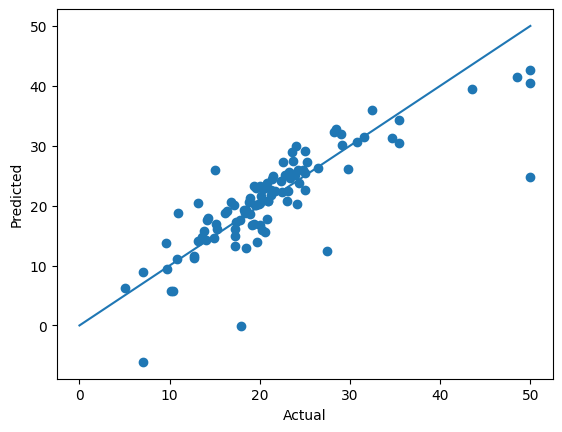

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0, 50], [0, 50])  # 45° line
plt.show()
# Residuals plot next for assumptions


In [27]:
## Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)
print("R² (Poly):", r2_score(y_test, y_poly_pred))
print("RMSE (Poly):", mean_squared_error(y_test, y_poly_pred))

R² (Poly): 0.8055829447951472
RMSE (Poly): 14.257338169061208


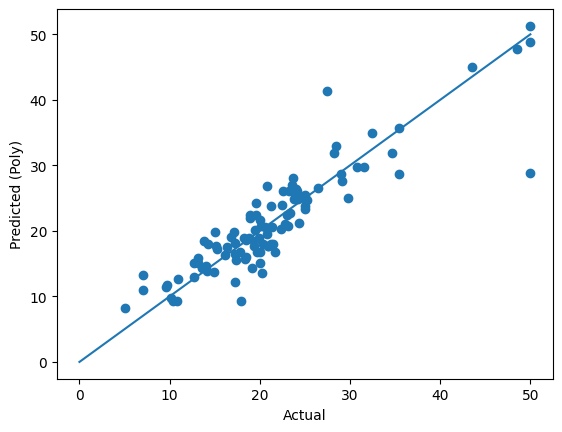

In [28]:
## visualize predictions
plt.scatter(y_test, y_poly_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted (Poly)")
plt.plot([0, 50], [0, 50])  # 45° line
plt.show()